In [1]:
from datetime import datetime 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
microsoft = pd.read_csv('d:\jupyter\New folder\MicrosoftStock.csv') 

microsoft.set_index(pd.DatetimeIndex(microsoft['date'].values), inplace=True)

microsoft.drop(['date', 'Name', "index"], axis=1, inplace = True)

microsoft

,open,high,low,close,volume
2013-02-08,27.35,27.710,27.3100,27.55,33318306
2013-02-11,27.65,27.920,27.5000,27.86,32247549
2013-02-12,27.88,28.000,27.7500,27.88,35990829
2013-02-13,27.93,28.110,27.8800,28.03,41715530
2013-02-14,27.92,28.060,27.8700,28.04,32663174
...,...,...,...,...,...
2018-02-01,94.79,96.070,93.5813,94.26,47227882
2018-02-02,93.64,93.970,91.5000,91.78,47867753
2018-02-05,90.56,93.240,88.0000,88.00,51031465
2018-02-06,86.89,91.475,85.2500,91.33,67998564


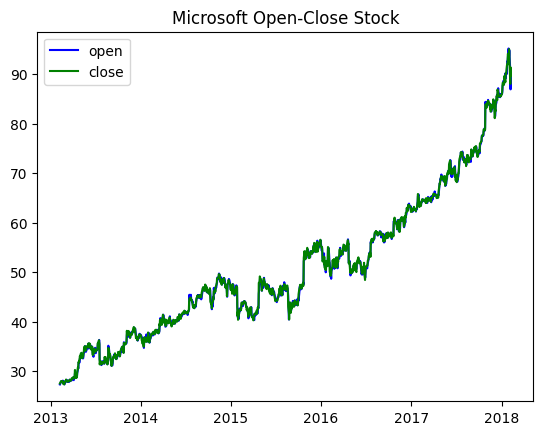

In [3]:
plt.plot(microsoft.index, microsoft['open'], color="blue", label="open") 
#
plt.plot(microsoft.index, microsoft['close'], color="green", label="close") 

plt.title("Microsoft Open-Close Stock") 

plt.legend() 


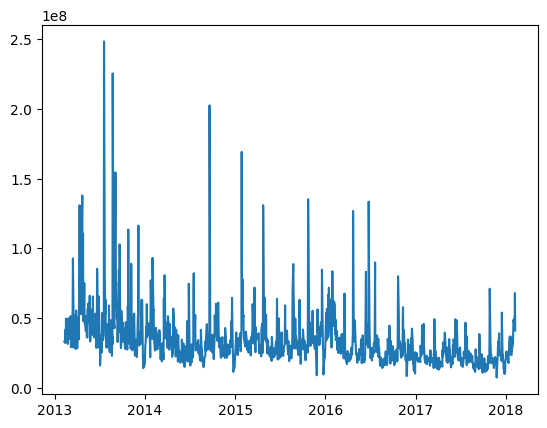

In [4]:
plt.plot(microsoft.index, microsoft['volume']) 
plt.show()


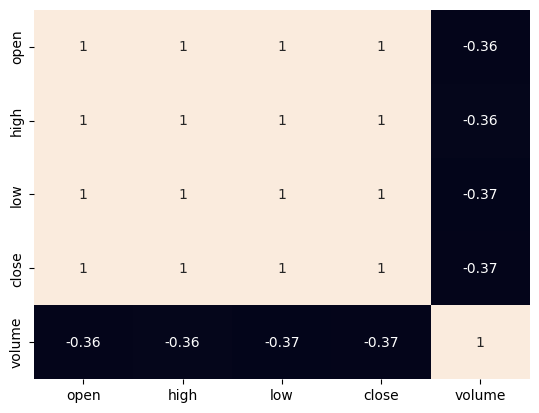

In [5]:
sns.heatmap(microsoft.corr(),annot=True, cbar=False) 
plt.show() 


Text(0.5, 1.0, 'Microsoft Stock Prices')

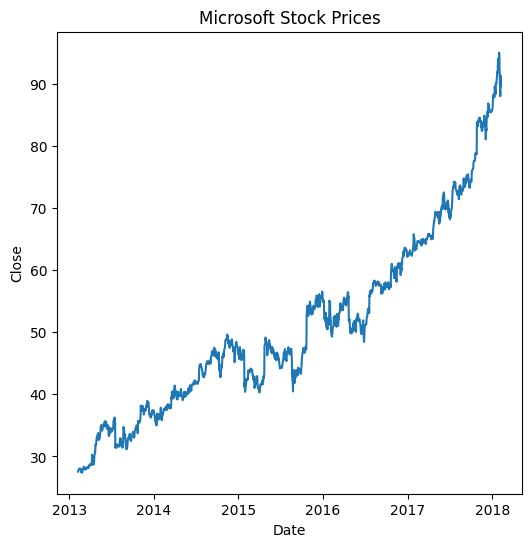

In [6]:
prediction = microsoft.loc[(microsoft.index  > datetime(2013, 1, 1)) 
                            & (microsoft.index  < datetime(2018, 1, 1))] 
  
plt.figure(figsize=(6, 6)) 
plt.plot(microsoft.index, microsoft['close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("Microsoft Stock Prices") 

In [7]:
x = microsoft.copy()

df = microsoft[['close']]

df

,close
2013-02-08,27.55
2013-02-11,27.86
2013-02-12,27.88
2013-02-13,28.03
2013-02-14,28.04
...,...
2018-02-01,94.26
2018-02-02,91.78
2018-02-05,88.00
2018-02-06,91.33


In [8]:
forecast=2

df['Prediction']=df[['close']].shift(-forecast)
df

C:\Users\ASuS\AppData\Local\Temp\ipykernel_1964\1597327282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['close']].shift(-forecast)


,close,Prediction
2013-02-08,27.55,27.880
2013-02-11,27.86,28.030
2013-02-12,27.88,28.040
2013-02-13,28.03,28.010
2013-02-14,28.04,28.045
...,...,...
2018-02-01,94.26,88.000
2018-02-02,91.78,91.330
2018-02-05,88.00,89.610
2018-02-06,91.33,NaN


In [9]:
x= x[:-forecast]
x

,open,high,low,close,volume
2013-02-08,27.35,27.71,27.3100,27.55,33318306
2013-02-11,27.65,27.92,27.5000,27.86,32247549
2013-02-12,27.88,28.00,27.7500,27.88,35990829
2013-02-13,27.93,28.11,27.8800,28.03,41715530
2013-02-14,27.92,28.06,27.8700,28.04,32663174
...,...,...,...,...,...
2018-01-30,93.30,93.66,92.1000,92.74,38635053
2018-01-31,93.75,95.40,93.5100,95.01,48756338
2018-02-01,94.79,96.07,93.5813,94.26,47227882
2018-02-02,93.64,93.97,91.5000,91.78,47867753


In [10]:
y= np.array(df['Prediction'])

y=y[:-forecast]

In [11]:
y

array([27.88, 28.03, 28.04, ..., 88.  , 91.33, 89.61])

In [12]:
x = np.array(x[['close' , 'volume']])
x

array([[2.7550000e+01, 3.3318306e+07],
       [2.7860000e+01, 3.2247549e+07],
       [2.7880000e+01, 3.5990829e+07],
       ...,
       [9.4260000e+01, 4.7227882e+07],
       [9.1780000e+01, 4.7867753e+07],
       [8.8000000e+01, 5.1031465e+07]])

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [14]:
lr=LinearRegression()

lr.fit(xtrain,ytrain)

lrconf=lr.score(xtest,ytest)

print('LR confidence: ',lrconf)

LR confidence:  0.9943556570472126


In [15]:
lrpred= lr.predict(x[-forecast:])
print('LR Method: ' ,lrpred)
print('-----------')

LR Method:  [91.92858796 88.13894625]
-----------
